### TASK 1. Plot your data.

The code below will plot your class data as histograms for "CFU/ml" or "No. of species", each for the two conditions, "LB-agar" or "Actinomycete Isolation Agar".

First, it prints the data out in a "pretty" table so that you can see what is there.

Then it plots the histograms ( that is the number of times values are found in the data).
It will also give as red dotted lines on the histogram the values entered by each pair in your group.

How much of an outlier are you?!

In the legend  to each  histogram, the means and standard deviations for your group as given, and the means and standard deviations for all the data in the histogram.
Are you standard deviations, for three points,  higher or lower than for the whole histogram - why?

First you must tell the code which file has your data - groups A,B or C.
Secondly, you need  to tell it your group.

In [12]:
# Select the filename for your group
filename="GroupC.csv"
#filename="GroupA.csv"
#filename="GroupB.csv"
#Set your Group
GroupName='Group 7'

,Group,CFU/ml_1,CFU/ml_2,CFU/ml_3,No_Species_1,No_Species_2,No_Species_3
0,Group 1,Calculated CFU/ml,NaN,NaN,Number of different species,NaN,NaN
1,Pair:,1,2,3,1,2.0,3.0
2,LB agar,1.94*10^6,1.42*10^6,4.6*10^6,7,6.0,5.0
3,Actinomycete isolation agar,1.61*10^6,1.82*10^6,2.0*10^6,10,6.0,6.0
5,Group 2,Calculated CFU/ml,NaN,NaN,Number of different species,NaN,NaN
6,Pair:,1,2,3,1,2.0,3.0
7,LB agar,NaN,NaN,NaN,NaN,NaN,NaN
8,Actinomycete isolation agar,NaN,NaN,NaN,NaN,NaN,NaN
10,Group 3,Calculated CFU/ml,NaN,NaN,Number of different species,NaN,NaN
11,Pair:,1,2,3,1,2.0,3.0


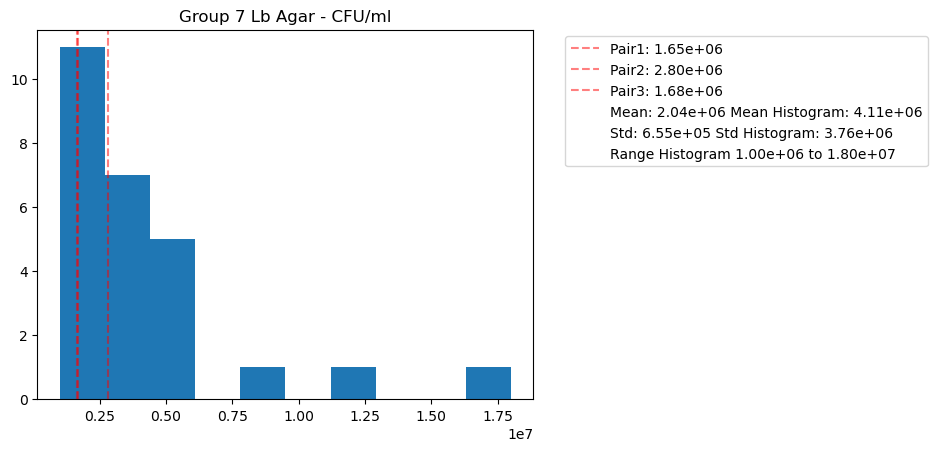

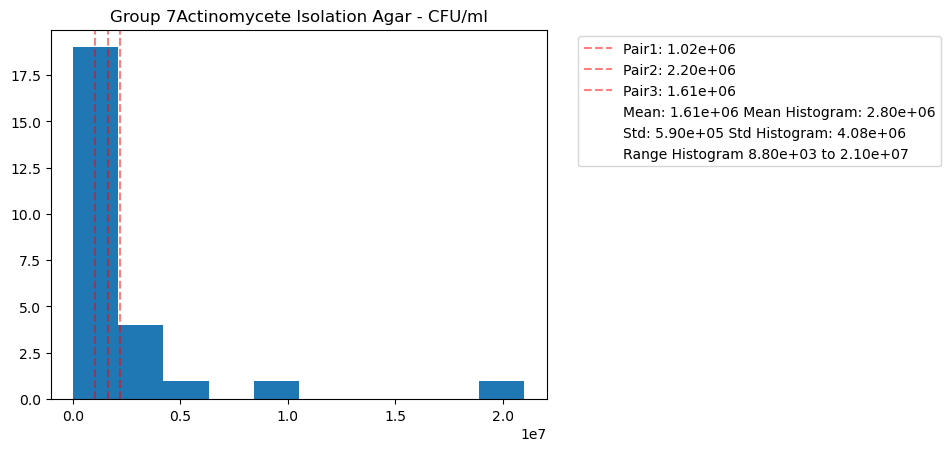

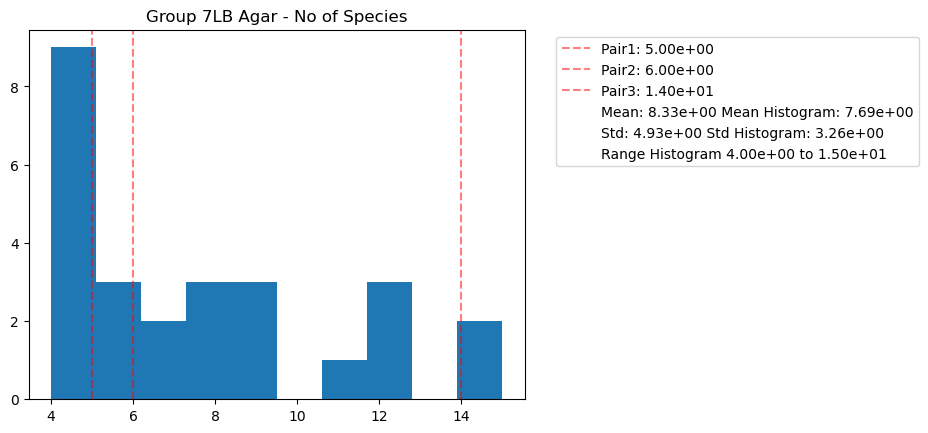

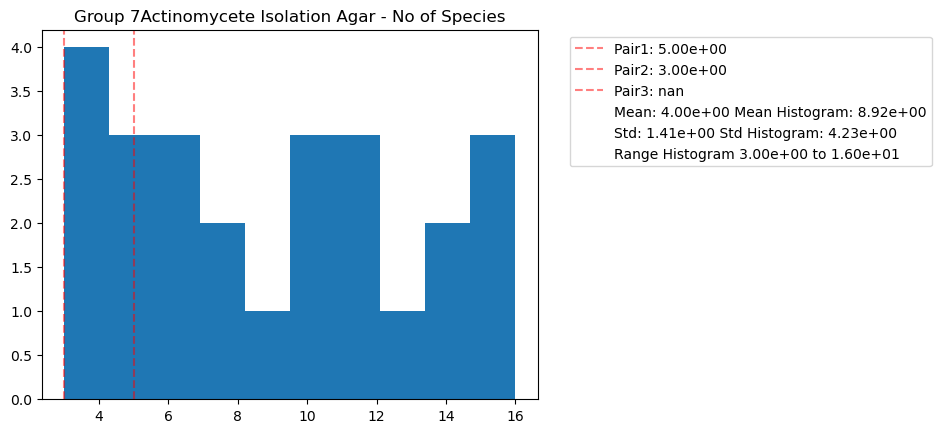

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
def convert_to_float(value):
    if pd.isna(value) or value == '-' or value == 'N/A':
        return np.nan
    if isinstance(value, str):
        if 'E' in value:
            return float(value)
        elif '*10^' in value:
            base, exp = value.split('*10^')
            return float(base) * 10**float(exp)
        else:
            return float(value)
    return float(value)
def media(frame,headers,tag,condition):
    output = []
# Loop through the dataframe
    for index, row in frame.iterrows():
#        print("row",row)
        if "Group" in str(row['Group']) and tag in str(row[headers[0]]):
#            print("row[headers[0]]",row[headers[0]]," tag ",tag)
            current_group = row['Group']  # Update current group when a new group header is found
        if pd.isna(row[headers[0]]):  # Skip rows with no data
#            print("row[headers[0]]",row[headers[0]])
            continue
#        print("condition,str(row['Group'])",condition,str(row['Group']))
        if condition in str(row['Group']):  # Checking if the row is specific to LB Agar
#            print("Cond 3",row[headers[0]])
            output.append(current_group)
            output.append(convert_to_float(row[headers[0]]))
            output.append(convert_to_float(row[headers[1]]))
            output.append(convert_to_float(row[headers[2]]))
    return output

# Read data

df=pd.read_csv(filename,header=None)
df.columns = ['Group','CFU/ml_1','CFU/ml_2','CFU/ml_3','No_Species_1','No_Species_2','No_Species_3'] # Insert header column
df.dropna(axis = 0, how = 'all', inplace = True) # Drop lines where all entries ar NaN
display(HTML(df.to_html())) # Pretty display of the dataframe



# Initialize an empty list the group name and pairs for each condition
lb_agar_cfu_list = []
lb_agar_cfu_histogram = []
lb_agar_cfu_group = []

actino_cfu_list = []
actino_cfu_histogram = []
actino_cfu_group = []

lb_agar_species = []
lb_agar_species_histogram = []

actino_species = []
actino_species_histogram = []

# Variable to keep track of the current group name
current_group = None

# Loop through the dataframe

# Function media returns a list of the numbers for all pairs for 'CFU/ml' or 'Number of Species' for each condition, LB or AIA 

lb_agar_cfu_list=media(df,['CFU/ml_1','CFU/ml_2','CFU/ml_3'],'Calculated CFU/ml','LB agar')
actino_cfu_list=media(df,['No_Species_1','No_Species_2','No_Species_3'],'Number of different species','Actinomycete isolation agar')
actino_cfu_list=media(df,['CFU/ml_1','CFU/ml_2','CFU/ml_3'],'Calculated CFU/ml','Actinomycete isolation agar')
lb_agar_species=media(df,['No_Species_1','No_Species_2','No_Species_3'],'Number of different species','LB agar')
actino_species=media(df,['No_Species_1','No_Species_2','No_Species_3'],'Number of different species','Actinomycete isolation agar')

def histogram_list(input_list, group_match):
    # FUnction takes list for a condition, where every 4'th value is a group number.
    #  Group numbers and "NaN" are removed. The cleaned up list is returned.
    op_hist=[] # Intialise Returned histogram list
    group_values=[] # Values for group_match
    in_play=-1 #counter after finding a group_match
    for i in range(len(input_list)): # Skip every fourth element, which is a group number
        if(i%4==0 and input_list[i]==group_match):
            in_play+=1
        if(i%4>0):
            if(in_play>-1):
                in_play+=1
            if(in_play>0 and in_play<4):
                group_values.append(input_list[i])
            if( not pd.isna(input_list[i])):   # If element is a number include.
                op_hist.append(input_list[i])
    return op_hist, group_values


# Calculate all conditions and variables as a list to be plotted as a histogram,
lb_agar_cfu_histogram=histogram_list(lb_agar_cfu_list,GroupName)[0]
lb_agar_cfu_group=histogram_list(lb_agar_cfu_list,GroupName)[1]
actino_histogram=histogram_list(actino_cfu_list,GroupName)[0]
actino_cfu_group = histogram_list(actino_cfu_list,GroupName)[1]
lb_agar_species_histogram=histogram_list(lb_agar_species,GroupName)[0]
lb_agar_species_group=histogram_list(lb_agar_species,GroupName)[1]
actino_species_histogram=histogram_list(actino_species,GroupName)[0]
actino_species_group=histogram_list(actino_species,GroupName)[1]

# print("lb_agar_cfu_group",lb_agar_cfu_group)
#print("lb_agar_cfu_group",lb_agar_cfu_group)
#print(lb_agar_cfu_histogram)
#print(histogram_list(lb_agar_cfu_list))
#print("actino_histogram",actino_histogram)
#print(histogram_list(actino_cfu_list))

#print(lb_agar_species)
#print(histogram_list(lb_agar_species,'Group 1'))
#print(actino_species_histogram)

# Plot each histogram
def histo_plot(title,hist_list,group_list,extent):
    import statistics
    plt.title(title)
    plt.hist(hist_list,range=extent)
    for idx, value in enumerate(group_list):
        plt.axvline(x=value, color='red', linestyle='--', alpha=0.5, 
                label=f'Pair{idx+1}: {value:.2e}')
    group_list = [x for x in group_list if not np.isnan(x)]
    mean_group_list = statistics.mean(group_list)
    if(len(group_list)<2):
        std_group_list=-1
    else:
        std_group_list = statistics.stdev(group_list)
    mean_hist = statistics.mean(hist_list)
    std_hist = statistics.stdev(hist_list)
    min_hist=min(hist_list)
    max_hist=max(hist_list)
    plt.plot([], [], ' ', label=f'Mean: {mean_group_list:.2e} Mean Histogram: {mean_hist:.2e}')
    if(std_group_list<0):
        plt.plot([], [], ' ', label=f'Std: Indeterminate Std Histogram: {std_hist:.2e}')    
    else:
        plt.plot([], [], ' ', label=f'Std: {std_group_list:.2e} Std Histogram: {std_hist:.2e}')
    plt.plot([], [], ' ', label=f'Range Histogram {min_hist:.2e} to {max_hist:.2e}')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Plot histograms - title, histogram values, group values, range of histogram from min to max. Change range if outliers making majority appear in first bin.
histo_plot(GroupName+' Lb Agar - CFU/ml',lb_agar_cfu_histogram,lb_agar_cfu_group,[min(lb_agar_cfu_histogram),max(lb_agar_cfu_histogram)])    
histo_plot(GroupName+'Actinomycete Isolation Agar - CFU/ml',actino_histogram,actino_cfu_group,[min(actino_histogram),max(actino_histogram)]) 
histo_plot(GroupName+'LB Agar - No of Species',lb_agar_species_histogram,lb_agar_species_group,[min(lb_agar_species_histogram),max(lb_agar_species_histogram)]) 
histo_plot(GroupName+'Actinomycete Isolation Agar - No of Species',actino_species_histogram,actino_species_group,[min(actino_species_histogram),max(actino_species_histogram)]) 



### Why is there variation anyway - stimulate sampling
Why is there such a wide variety of answers? Did some people make mistakes, and some get the "perfect" answer?

Certainly, some might have made systematic errors, but variation occurs even without any systematic error.

Open the simulation of your experiment in the link below. Read the instructions.

How does the mean change as you increase the number of bacteria per ml?
How doe sit change when ou do moe trials?

Last year some students wrote in their final paper that there was a significant difference between one conditions that gave  4 cfu/ml and another 3 cfu/ml. Where they justified?

[Link to the simulation.](https://mclaughlin.bio.ed.ac.uk/DISCOVERY/Sampling_Poisson.html)

## Simulate the difference statistic between means of cfu/ml LB_Agar and Actinomycete Isolation Agar

This code is a modified version of what was used in Variation to look at differences in beak-sizes in Darwin Finches before and after a drought year.

Here, though,  we are comparing the average number of CFU/ml from soil gown on LB Agar or Actinomycete Isolation Agar. We are going to simulate the distributions you found by assuming a normal distribution with the histogram mean and standard deviation for LB Agar, and look at the difference with the mean for Actinomycete isolation agar. We will run the simulation 10,000 times, and each time work out the absolute value of the difference between means. By plotting a histogram of the number of times a difference of a certain value comes up after 10,000 trials, we can estimate how likely this has happened by chance.

In the cell below set the values by looking at your plots of CFU/ml for LB Agar and Actionmycete Isolation Agar. Use the values for the histogram (whole class data) 

In [3]:
# Set the population's parameters. As we are assuming that the null model were true, both populations have identical parameters.
mu = 2.11E6 # Mean for LB Agar (Histogram value)
sigma = 3.76E6 # Standard Deviation for LB Agar (Histogram value)

d_obs = abs(1.31E6) # Difference between means for LB Agar and Actinomycete Isolation Agar (histogram values) 



### Stimulating LB Agar and Actinomycete Isolation Agar sampling from a normal distribution.
Here we do 100,000 trials, for each one taking 30 values randomly out of a normal distribution that has the same mean and standard deviation as for the means and standard deviation calculated for your class data. We plot the first trial so that you can see what they look like.

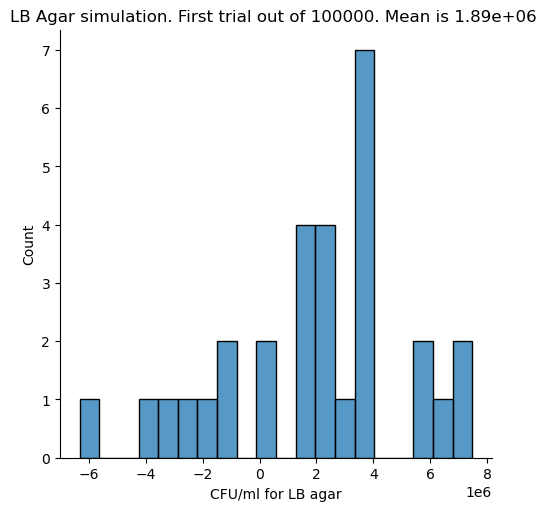

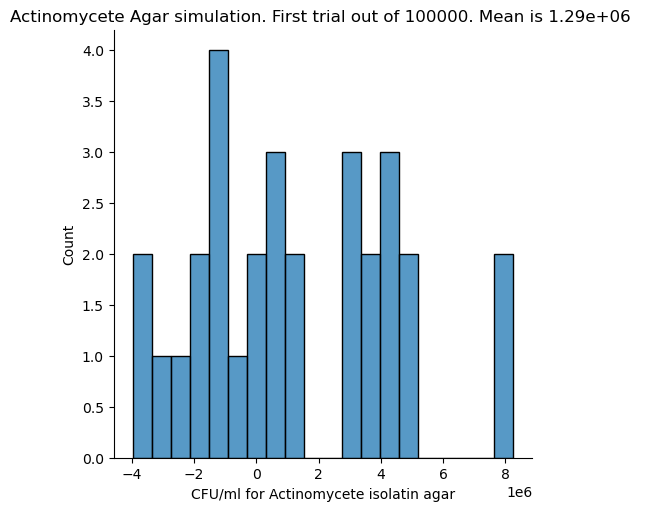

In [5]:
from numpy.random import normal
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Set the number of trials to 100,000.
number_of_trials = 100000

n_lb=30  # No of LB agar samples we take
n_aia=30 # No of actinomycyte isolation agar samples we take

sample_lb_instance=[] # List to hold the first trial for lb
sample_aia_instance=[] # List to hold teh first trial for aia

# 100,000 trials
samples_lb = normal(mu, sigma, (n_lb, number_of_trials))


for i in samples_lb :
    sample_lb_instance.append(i[0])

mean_lb_instance=np.mean(sample_lb_instance)
g = sns.displot(x=sample_lb_instance,bins=20)
g.ax.set_title('LB Agar simulation. First trial out of '+str(number_of_trials)+'. Mean is '+f'{mean_lb_instance:.2e} ')
g.ax.set_xlabel('CFU/ml for LB agar')
plt.show()
# 100,000 random samples of aia 
samples_aia = normal(mu, sigma, (n_aia, number_of_trials))

for i in samples_aia :
    sample_aia_instance.append(i[0])
#print(sample_lb_instance)
mean_aia_instance=np.mean(sample_aia_instance)
g = sns.displot(sample_aia_instance,bins=20)
g.ax.set_title('Actinomycete Agar simulation. First trial out of '+str(number_of_trials)+'. Mean is '+f'{mean_aia_instance:.2e} ')
g.ax.set_xlabel('CFU/ml for Actinomycete isolatin agar')
plt.show()
#print(samples_lb)
#print(samples_aia)



## Calculating the d-statistic
As in Variation LadyBird Practial, we calculate the mean of each trial (of 30 random points) taken from the normal distribution. We print out the d value for the first trial (teh absolute difference between the two means in that trial). But we do this 100,000 times, so we can plot how frequently such a difference occurs in 100,000 trials. So for any difference, we can then work out how frequent (probable) it is to have ourred by chance.   

Average for first trial LB agar is  1.89e+06
Average for first trial ActinoMycete Agar is  1.29e+06
d-statistic (absolute differences between means) for first trial 6.00e+05


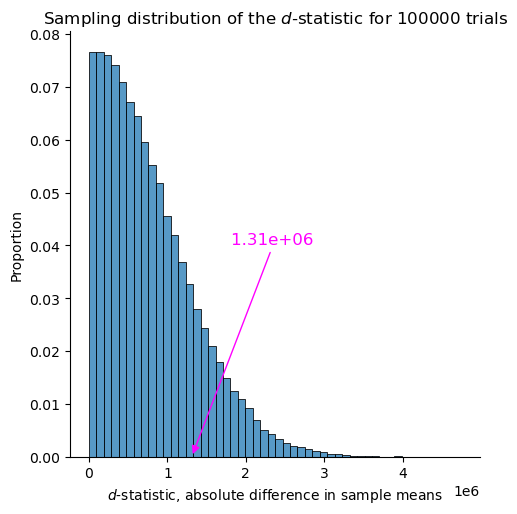

In [7]:
# Calculate all sample means
xbars_lb = samples_lb.mean(axis=0)
xbars_aia = samples_aia.mean(axis=0)
print("Average for first trial LB agar is ",f'{xbars_lb[0]:.2e}' )
print("Average for first trial ActinoMycete Agar is ",f'{xbars_aia[0]:.2e}')
# Calculate the d-statistic for each pair of samples
ds = abs(xbars_lb - xbars_aia)
print("d-statistic (absolute differences between means) for first trial",f'{ds[0]:.2e}')
# Sampling distribution of the d-statistic
g = sns.displot(ds, bins=50, stat='proportion')


# Add some annotation
g.ax.set_xlabel('$d$-statistic, absolute difference in sample means')
g.ax.set_title('Sampling distribution of the $d$-statistic for '+str(number_of_trials)+' trials')
g.ax.annotate(f'{d_obs:.2e} ', (d_obs, 0), (0.5, 0.5), textcoords='axes fraction', color='magenta', fontsize=12, arrowprops={'arrowstyle':'-|>', 'color':'magenta'}, ha='center'); # Add an arrow at the observed d-statistic

## Calculating the probability that the observed difference is due to chance
Having calculated above how many times in 100,000 any difference comes up, we can calculate the percentage of the distribution that has a greater difference. If a large percentage is greater than your d-value, then the chances are low that the observed difference is due to chance. But if the percentage greater is low, then the difference is unlikely to be due to chance (because it came up so few times in 100,000  Trials).

Run the code below to get this probability. Check the observed difference shown in the distribution above. Does the probability make sense?

What we have simulated here is essentially similar to what t-test or Mann-Whitney tests of significance do mathematically. But stimulations give you more of a "feel" or what is going on.  


In [8]:
# Set a tally for the number of times the absolute value of the d-statistic is at least 3.69
count = 0


# Loop through all simulated values of d
for d in ds:
    
    # Increment tally if d is at least (greater than or equal to) 0.49 mm
    if d >= d_obs:
        count += 1

        
# Calculate the p-value 
# (the number of samples in which the difference is at least 0.49 mm divided by the total number of samples)
p_value = count / len(ds)


# Print the value of the test statistic and the p-value
print(f'd-statistic = {d_obs:.2f}')
print(f'p-value = {p_value:.4f}')

d-statistic = 1310000.00
p-value = 0.1769


### Is your data Normal
For the simulation, we assumed that the 30 samples were taken from a normally distributed population. In that case we can use a t-test, which requires this.

But if the data are not normally distributed, we should use a "non-parametric" test, in this case a Mann-Whitney U test. You met both of these in Variation. This works by comparing the rank order ( 1st, 2nd 3rd ...) of the data in the two populations. For instance, if each distribution has 30 points, but all the highest values 1-30 where the first population and ranks 31-60 were in teh second population, it would be unlikely that the distributions were just different by chance. 

So first we need to check if the data are normal. One way to do this is to plot the order of the data as we would  expect theoretically for a normal distribution against the actual order. If this gives a straight line, we can be more sure that the distribution is normal. A Shapiro-Wilk test can be used to give an estimate that the fit is normal only due to chance. It calculates a factor that if close to 1 is a measure of how normal is the distribution of data. The probability it gives is that the value calculated could be explained due to chance.

These are worked out below for all histograms of your class data. Rub teh cell below.

lb_agar_cfu Tests:


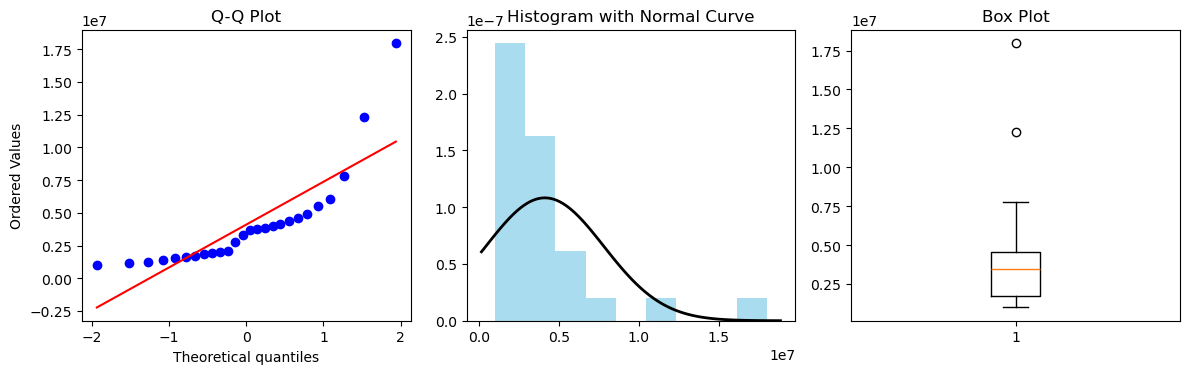


Shapiro-Wilk Test:
  statistic: 0.7115227369192163
  p-value: 7.653993342908726e-06
lb_agar_cfu Tests:


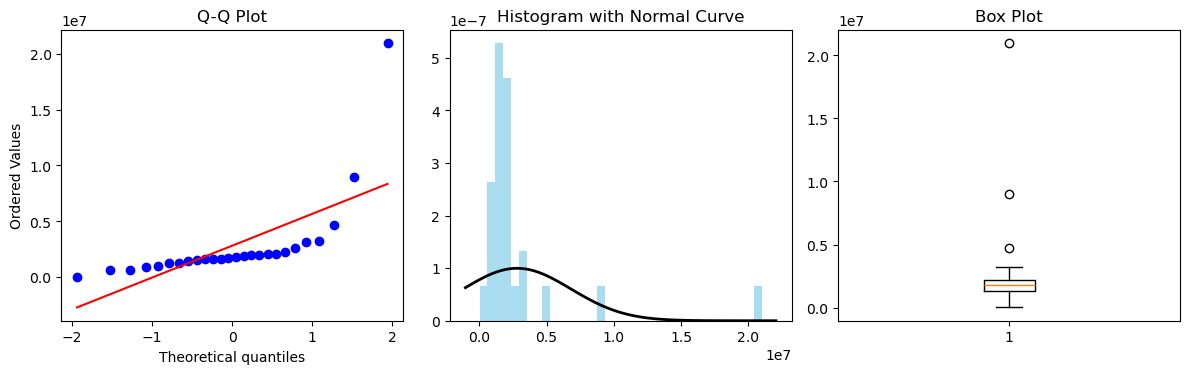


Shapiro-Wilk Test:
  statistic: 0.48275364658629705
  p-value: 1.6872590014308888e-08
lb_agar_cfu Tests:


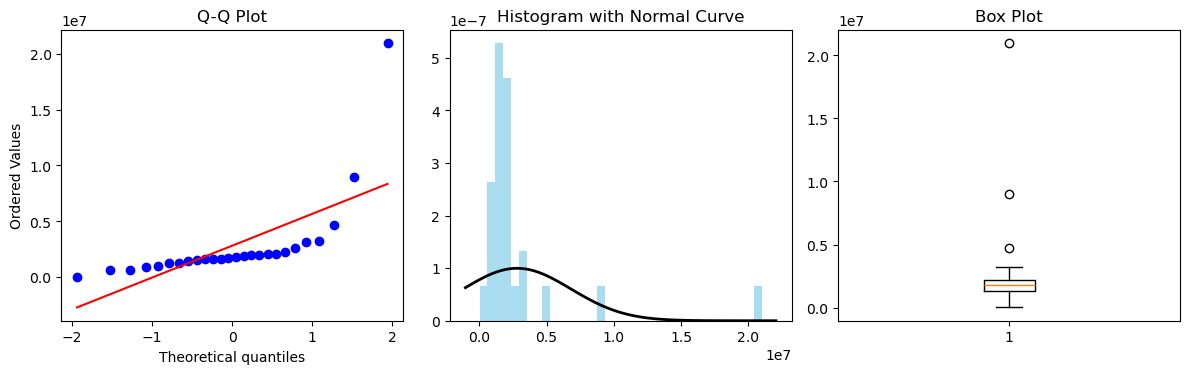


Shapiro-Wilk Test:
  statistic: 0.48275364658629705
  p-value: 1.6872590014308888e-08
lb_agar_species_histogram Tests:


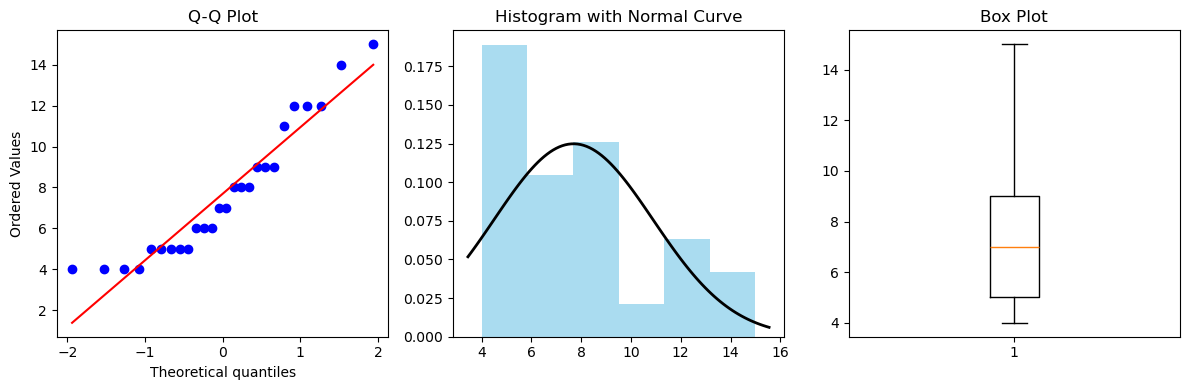


Shapiro-Wilk Test:
  statistic: 0.9021389666571882
  p-value: 0.01748210198798966
actino_species_histogram Tests:


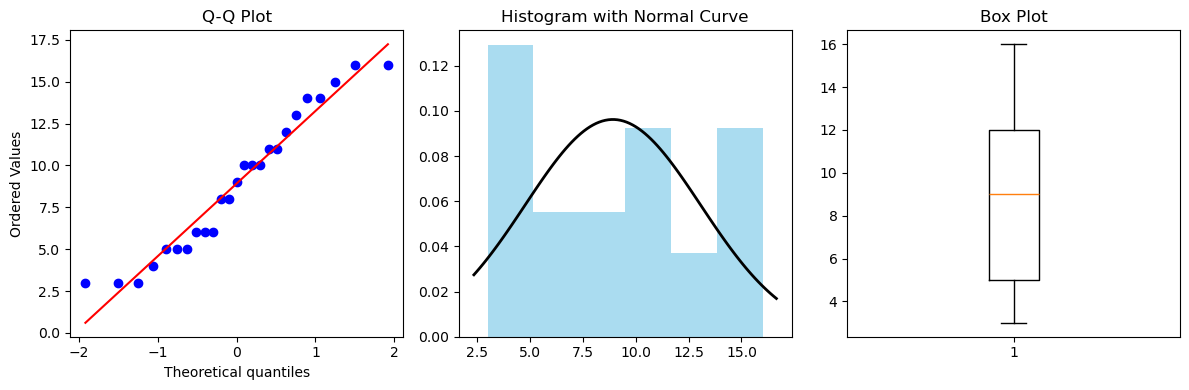


Shapiro-Wilk Test:
  statistic: 0.9368015403395084
  p-value: 0.12484844897881425


In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def test_normality(data):
    """
    Perform multiple normality tests on the input data.
    
    Parameters:
    -----------
    data : numpy.ndarray
        Input array to test for normality
    
    Returns:
    --------
    dict : A dictionary containing results of different normality tests
    """
    # Shapiro-Wilk Test
    shapiro_statistic, shapiro_p_value = stats.shapiro(data)
    
    # Anderson-Darling Test
    anderson_result = stats.anderson(data, dist='norm')
    
    # Kolmogorov-Smirnov Test
    ks_statistic, ks_p_value = stats.kstest(data, 'norm')
    
    # Jarque-Bera Test
    jarque_statistic, jarque_p_value = stats.jarque_bera(data)
    
    # Visual Tests
    plt.figure(figsize=(12, 4))
    
    # Q-Q Plot
    plt.subplot(131)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    # Histogram with Normal Distribution Overlay
    plt.subplot(132)
    plt.hist(data, bins='auto', density=True, alpha=0.7, color='skyblue')
    mu, std = np.mean(data), np.std(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('Histogram with Normal Curve')
    
    # Box Plot
    plt.subplot(133)
    plt.boxplot(data)
    plt.title('Box Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Compile results
    results = {
        "Shapiro-Wilk Test": {
            "statistic": shapiro_statistic,
            "p-value": shapiro_p_value
        }
    }
    
    return results


print("lb_agar_cfu Tests:")
lb_agar_cfu_histogram_results = test_normality(lb_agar_cfu_histogram)
for test, metrics in lb_agar_cfu_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")


print("lb_agar_cfu Tests:")
actino_histogram_results = test_normality(actino_histogram)
for test, metrics in actino_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")


print("lb_agar_cfu Tests:")
actino_histogram_results = test_normality(actino_histogram)
for test, metrics in actino_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")

print("lb_agar_species_histogram Tests:")
lb_agar_species_histogram_results = test_normality(lb_agar_species_histogram)
for test, metrics in lb_agar_species_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")

print("actino_species_histogram Tests:")
actino_species_histogram_results = test_normality(actino_species_histogram)
for test, metrics in actino_species_histogram_results.items():
    print(f"\n{test}:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")



### Running Mann-Whitney Test
If your data were not normal, this is the appropriate test.
Edit the lines:

```mw_results = perform_mann_whitney_test(lb_agar_cfu_histogram, actino_histogram)```

for the CFU/ml data, if you judge that not  to be normal

or change to

```mw_results = perform_mann_whitney_test(lb_agar_species_histogram,actino_species_histogram)```

for the no of species data, if you judge that not to be normal

/tmp/ipykernel_451/2148214575.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])


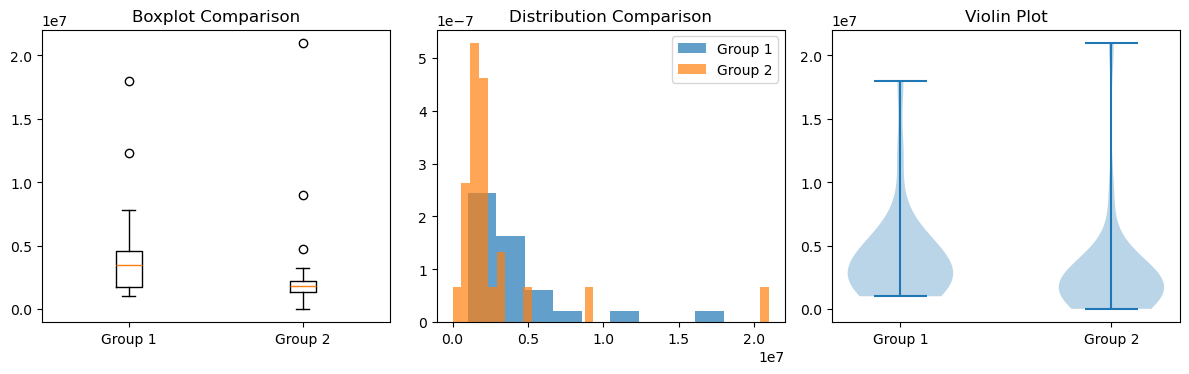

Mann-Whitney U Test Analysis:

Group 1:
  median: 3500000.0
  mean: 4113846.153846154
  std: 3758585.9861634956
  size: 26

Group 2:
  median: 1770000.0
  mean: 2801107.6923076925
  std: 4078463.2671557143
  size: 26

Mann-Whitney U Test Results:
  U-statistic: 471.0
  p-value: 0.015310094976420623
  statistically_significant: True

Interpretation:
  Reject null hypothesis if p-value < 0.05


In [11]:
def perform_mann_whitney_test(array1, array2):
    """
    Perform a Mann-Whitney U test between two NumPy arrays.
    
    Parameters:
    -----------
    array1 : numpy.ndarray
        First sample array
    array2 : numpy.ndarray
        Second sample array
    
    Returns:
    --------
    dict : A dictionary containing Mann-Whitney U test results
    """
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(array1, array2, alternative='two-sided')
    
    # Compute descriptive statistics
    results = {
        "Group 1": {
            "median": np.median(array1),
            "mean": np.mean(array1),
            "std": np.std(array1, ddof=1),
            "size": len(array1)
        },
        "Group 2": {
            "median": np.median(array2),
            "mean": np.mean(array2),
            "std": np.std(array2, ddof=1),
            "size": len(array2)
        },
        "Mann-Whitney U Test Results": {
            "U-statistic": statistic,
            "p-value": p_value,
            "statistically_significant": p_value < 0.05
        },
        "Interpretation": "Reject null hypothesis if p-value < 0.05"
    }
    
    # Visualize distributions
    plt.figure(figsize=(12, 4))
    
    # Boxplot
    plt.subplot(131)
    plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])
    plt.title('Boxplot Comparison')
    
    # Kernel Density Estimation
    plt.subplot(132)
    plt.hist(array1, bins='auto', density=True, alpha=0.7, label='Group 1')
    plt.hist(array2, bins='auto', density=True, alpha=0.7, label='Group 2')
    plt.title('Distribution Comparison')
    plt.legend()
    
    # Violin Plot
    plt.subplot(133)
    plt.violinplot([array1, array2])
    plt.title('Violin Plot')
    plt.xticks([1, 2], ['Group 1', 'Group 2'])
    
    plt.tight_layout()
    plt.show()
    
    return results

# Example usage

# Perform Mann-Whitney U test
mw_results = perform_mann_whitney_test(lb_agar_cfu_histogram, actino_histogram)
#mw_results = perform_mann_whitney_test(lb_agar_species_histogram,actino_species_histogram)
# Print results
print("Mann-Whitney U Test Analysis:")
for key, value in mw_results.items():
    print(f"\n{key}:")
    if isinstance(value, dict):
        for subkey, subvalue in value.items():
            print(f"  {subkey}: {subvalue}")
    else:
        print(f"  {value}")
        

In [ ]:
### Running t-Test
If your data are normal, this is the appropriate test.
Edit the lines:

```mw_results = perform_ttesy(lb_agar_cfu_histogram, actino_histogram)```

for the CFU/ml data, if you judge that to be normal

or change to

```mw_results = perform_ttest(lb_agar_species_histogram,actino_species_histogram)```

for the no of species data, if you judge that to be normal

/tmp/ipykernel_322/3792678665.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])


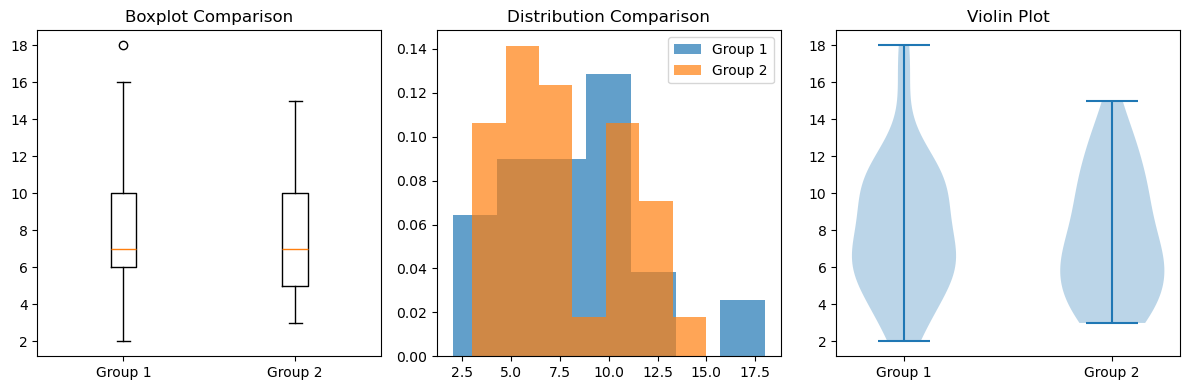

T-Test Analysis:

Group 1:
  mean: 8.058823529411764
  std: 3.5839809968938527
  size: 34

Group 2:
  mean: 7.636363636363637
  std: 3.37099931231621
  size: 33

T-Test Results:
  t-statistic: 0.49713400205939423
  p-value: 0.6207735901352276
  statistically_significant: False

Interpretation:
  Reject null hypothesis if p-value < 0.05


In [71]:
def perform_ttest(array1, array2, equal_var=False):
    """
    Perform a two-sided independent t-test between two NumPy arrays.
    
    Parameters:
    -----------
    array1 : numpy.ndarray
        First sample array
    array2 : numpy.ndarray
        Second sample array
    equal_var : bool, optional (default=False)
        Whether to assume equal variances between groups
        
    Returns:
    --------
    dict : A dictionary containing t-test results
    """
    # Compute t-statistic and p-value
    t_statistic, p_value = stats.ttest_ind(array1, array2, equal_var=equal_var)
    
    # Compute descriptive statistics
    results = {
        "Group 1": {
            "mean": np.mean(array1),
            "std": np.std(array1, ddof=1),
            "size": len(array1)
        },
        "Group 2": {
            "mean": np.mean(array2),
            "std": np.std(array2, ddof=1),
            "size": len(array2)
        },
        "T-Test Results": {
            "t-statistic": t_statistic,
            "p-value": p_value,
            "statistically_significant": p_value < 0.05
        },
        "Interpretation": "Reject null hypothesis if p-value < 0.05"
    }
     # Visualize distributions
    plt.figure(figsize=(12, 4))
    
    # Boxplot
    plt.subplot(131)
    plt.boxplot([array1, array2], labels=['Group 1', 'Group 2'])
    plt.title('Boxplot Comparison')
    
    # Kernel Density Estimation
    plt.subplot(132)
    plt.hist(array1, bins='auto', density=True, alpha=0.7, label='Group 1')
    plt.hist(array2, bins='auto', density=True, alpha=0.7, label='Group 2')
    plt.title('Distribution Comparison')
    plt.legend()
    
    # Violin Plot
    plt.subplot(133)
    plt.violinplot([array1, array2])
    plt.title('Violin Plot')
    plt.xticks([1, 2], ['Group 1', 'Group 2'])
    
    plt.tight_layout()
    plt.show()
    
    
    return results

# Example usage
np.random.seed(42)

# Generate two sample arrays

# Perform t-test
ttest_results = perform_ttest(lb_agar_species_histogram,actino_species_histogram)
#ttest_results = perform_mann_ttest(lb_agar_cfu_histogram, actino_histogram)
# Print results
print("T-Test Analysis:")
for key, value in ttest_results.items():
    print(f"\n{key}:")
    if isinstance(value, dict):
        for subkey, subvalue in value.items():
            print(f"  {subkey}: {subvalue}")
    else:
        print(f"  {value}")


### Warning about interpreting p-values
A p-value of 0.05 does not mean that the difference is highly significant. It just means that under the null hypothesis that there is no difference, and given the data you have sampled, there is a probability of 0.05 the observed difference was due to chance. If you measured more data points, the p value could be larger or smaller. So it is as much a measure of what you can tell from your experiment rather than absolute proof the null hypothesis is untenable or that an alternative hypothesis is correct. Also note that a difference may have a low probability of being due to chance, but it still might be too small to make any practical difference ( the more sata you have, the more chance you have to find that difference statistically significant, but it may not be practically significant).    